In [4]:
# Load packages
import os
import pandas as pd
import numpy as np

# This line is needed to display plots inline in Jupyter Notebook
%matplotlib inline

# Required for basic python plotting functionality
import matplotlib.pyplot as plt

# Required for formatting dates later in the case
import datetime
import matplotlib.dates as mdates

# Required to display image inline
from IPython.display import Image

# Advanced plotting functionality with seaborn
import seaborn as sns
sns.set(style="whitegrid") # can set style depending on how you'd like it to look
dir_data = "C:/Users/Acer/Documents/DSA4/ClassesNotebooks/DS4A_prg/cases/Cases_JupyterNote/case_1.5_student/"

In [6]:
# Load the data into python
energy_df = pd.read_csv(dir_data + 'energy_consumption.csv')
electricity_df = pd.read_csv(dir_data + 'electricity_generation.csv')

In [8]:
energy_df.head()

,YYYYMM,Value,Description,Unit
0,197301,1313.816,Primary Energy Consumed by the Residential Sector,Trillion Btu
1,197302,1150.011,Primary Energy Consumed by the Residential Sector,Trillion Btu
2,197303,970.362,Primary Energy Consumed by the Residential Sector,Trillion Btu
3,197304,709.631,Primary Energy Consumed by the Residential Sector,Trillion Btu
4,197305,544.596,Primary Energy Consumed by the Residential Sector,Trillion Btu


In [11]:
print(energy_df['Description'].unique())

['Primary Energy Consumed by the Residential Sector'
 'Total Energy Consumed by the Residential Sector'
 'Primary Energy Consumed by the Commercial Sector'
 'Total Energy Consumed by the Commercial Sector'
 'Primary Energy Consumed by the Industrial Sector'
 'Total Energy Consumed by the Industrial Sector'
 'Primary Energy Consumed by the Transportation Sector'
 'Total Energy Consumed by the Transportation Sector'
 'Primary Energy Consumed by the Electric Power Sector'
 'Primary Energy Consumption Total']


In [13]:
electricity_df.head()

,YYYYMM,Value,Description,Unit
0,197301,75190.149,"Electricity Net Generation From Coal, All Sectors",Million Kilowatthours
1,197302,67797.946,"Electricity Net Generation From Coal, All Sectors",Million Kilowatthours
2,197303,67387.612,"Electricity Net Generation From Coal, All Sectors",Million Kilowatthours
3,197304,63935.049,"Electricity Net Generation From Coal, All Sectors",Million Kilowatthours
4,197305,64927.181,"Electricity Net Generation From Coal, All Sectors",Million Kilowatthours


In [15]:
print(electricity_df['Description'].unique())

['Electricity Net Generation From Coal, All Sectors'
 'Electricity Net Generation From Petroleum, All Sectors'
 'Electricity Net Generation From Natural Gas, All Sectors'
 'Electricity Net Generation From Other Gases, All Sectors'
 'Electricity Net Generation From Nuclear Electric Power, All Sectors'
 'Electricity Net Generation From Hydroelectric Pumped Storage, All Sectors'
 'Electricity Net Generation From Conventional Hydroelectric Power, All Sectors'
 'Electricity Net Generation From Wood, All Sectors'
 'Electricity Net Generation From Waste, All Sectors'
 'Electricity Net Generation From Geothermal, All Sectors'
 'Electricity Net Generation From Solar, All Sectors'
 'Electricity Net Generation From Wind, All Sectors'
 'Electricity Net Generation Total, All Sectors']


Here we see that we have a variety of energy consumption sectors, as well as a variety of energy generation sources for each sector. We are specifically interested in nuclear electric power generation and electric power consumption as the firm's main sources of revenue stem from these.

In [17]:
# Extract the month
energy_df['MM'] = energy_df['YYYYMM'].apply(lambda x: int(str(x)[-2:]))
electricity_df['MM'] = electricity_df['YYYYMM'].apply(lambda x: int(str(x)[-2:]))

# Extract the year
energy_df['YYYY'] = energy_df['YYYYMM'].apply(lambda x: int(str(x)[:-2]))
electricity_df['YYYY'] = electricity_df['YYYYMM'].apply(lambda x: int(str(x)[:-2]))

Moreover, notice that the existing descriptions are quite long. We might as well use some abbreviations:

- PEC: Primary Energy Consumption
- TEC: Total Energy Consumption
- ENG: Electricity Net Generation

Let's change the ```Description``` column to use the abbreviated form and reduce the clutter of the output. This will be useful when we are plotting later on and want clean organized figures:

In [19]:
# Rename Descriptions for the energy data
energy_short_dict = {'Primary Energy Consumed by the Commercial Sector': 'PEC Commercial Sector',
              'Primary Energy Consumed by the Electric Power Sector': 'PEC Electric Power Sector',
              'Primary Energy Consumed by the Industrial Sector': 'PEC Industrial Sector',
              'Primary Energy Consumed by the Residential Sector': 'PEC Residential Sector',
              'Primary Energy Consumed by the Transportation Sector': 'PEC Transportation Sector',
              'Primary Energy Consumption Total': 'PEC Total',
              'Total Energy Consumed by the Commercial Sector': 'TEC Commercial Sector',
              'Total Energy Consumed by the Industrial Sector': 'TEC Industrial Sector',
              'Total Energy Consumed by the Residential Sector': 'TEC Residential Sector',
              'Total Energy Consumed by the Transportation Sector': 'TEC Transportation Sector'}

# Clean up names by shortening description
clean_energy_df = energy_df.copy()
clean_energy_df['Description'] = clean_energy_df['Description'].apply(lambda x: energy_short_dict[x])
clean_energy_df.head()

,YYYYMM,Value,Description,Unit,MM,YYYY
0,197301,1313.816,PEC Residential Sector,Trillion Btu,1,1973
1,197302,1150.011,PEC Residential Sector,Trillion Btu,2,1973
2,197303,970.362,PEC Residential Sector,Trillion Btu,3,1973
3,197304,709.631,PEC Residential Sector,Trillion Btu,4,1973
4,197305,544.596,PEC Residential Sector,Trillion Btu,5,1973


In [21]:
# Rename Descriptions for the electricity data
electricity_short_dict = {'Electricity Net Generation From Coal, All Sectors': 'ENG Coal',
                          'Electricity Net Generation From Conventional Hydroelectric Power, All Sectors': 'ENG HE Power',
                          'Electricity Net Generation From Geothermal, All Sectors': 'ENG Geothermal',
                          'Electricity Net Generation From Hydroelectric Pumped Storage, All Sectors': 'ENG HE Pumped Storage',
                          'Electricity Net Generation From Natural Gas, All Sectors': 'ENG Natural Gas',
                          'Electricity Net Generation From Nuclear Electric Power, All Sectors': 'ENG Nuclear Electric Power',
                          'Electricity Net Generation From Other Gases, All Sectors': 'ENG Other Gases',
                          'Electricity Net Generation From Petroleum, All Sectors': 'ENG Petroleum',
                          'Electricity Net Generation From Solar, All Sectors': 'ENG Solar',
                          'Electricity Net Generation From Waste, All Sectors': 'ENG Waste',
                          'Electricity Net Generation From Wind, All Sectors': 'ENG Wind',
                          'Electricity Net Generation From Wood, All Sectors': 'ENG Wood',
                          'Electricity Net Generation Total, All Sectors': 'ENG Total'}

# Clean up names by shortening description
clean_electricity_df = electricity_df.copy()
clean_electricity_df['Description'] = clean_electricity_df['Description'].apply(lambda x: electricity_short_dict[x])
clean_electricity_df.head()

,YYYYMM,Value,Description,Unit,MM,YYYY
0,197301,75190.149,ENG Coal,Million Kilowatthours,1,1973
1,197302,67797.946,ENG Coal,Million Kilowatthours,2,1973
2,197303,67387.612,ENG Coal,Million Kilowatthours,3,1973
3,197304,63935.049,ENG Coal,Million Kilowatthours,4,1973
4,197305,64927.181,ENG Coal,Million Kilowatthours,5,1973


In [24]:
# Define the consumption and generation categories we are interested in
consume_category = 'PEC Electric Power Sector'
generate_category = 'ENG Nuclear Electric Power'

# Select the Electric Power Sector for energy consumption
consume_df = clean_energy_df[clean_energy_df['Description'] == consume_category][['YYYYMM','Value']].reset_index(drop=True)

# Select nuclear electric power for energy consumption (all sectors)
generate_df = clean_electricity_df[clean_electricity_df['Description'] == generate_category][['YYYYMM','Value']].reset_index(drop=True)

# Merge into one data frame for ease of plotting
merged_df = pd.merge(consume_df, generate_df, how='left', on=['YYYYMM'], suffixes=('_CONSUME','_GENERATE'))

merged_df.head()

,YYYYMM,Value_CONSUME,Value_GENERATE
0,197301,1691.096,6246.251
1,197302,1511.458,5928.069
2,197303,1559.159,6649.007
3,197304,1470.152,5876.392
4,197305,1551.631,5696.657


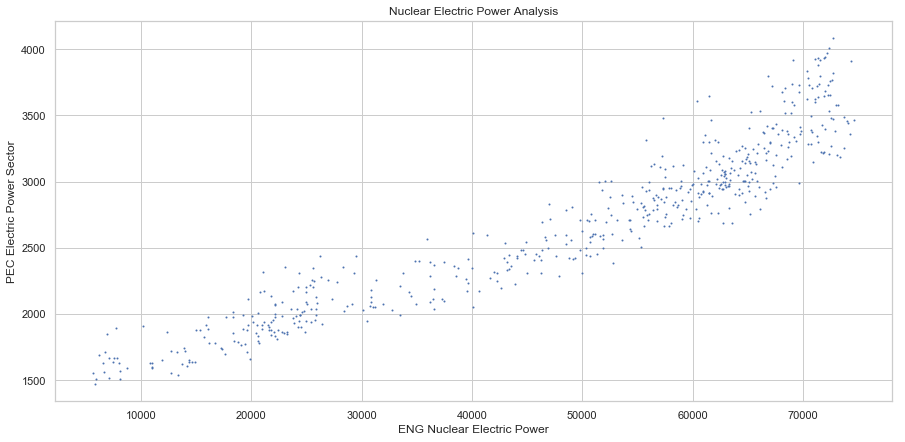

In [25]:
# Create basic scatter plot to view two-variable relationship
plt.figure(figsize=(15, 7))
plt.scatter(merged_df['Value_GENERATE'], merged_df['Value_CONSUME'], s=1)
plt.title('Nuclear Electric Power Analysis');
plt.xlabel(generate_category);
plt.ylabel(consume_category);

### Exercise 1:

Write code to produce additional scatterplots that give insight into the relationship between the energy consumption for the commercial sector and nuclear electric power net energy generation. Is the relationship between these variables stronger or weaker when compared to the electric power sector's result? What might this mean in terms of a potential business recommendation?

In [29]:
def plot_relation(consume_category,generate_category):
    # Select the Electric Power Sector for energy consumption
    consume_df = clean_energy_df[clean_energy_df['Description'] == consume_category][['YYYYMM','Value']].reset_index(drop=True)
    # Select nuclear electric power for energy consumption (all sectors)
    generate_df = clean_electricity_df[clean_electricity_df['Description'] == generate_category][['YYYYMM','Value']].reset_index(drop=True)
    # Merge into one data frame for ease of plotting
    merged_df = pd.merge(consume_df, generate_df, how='left', on=['YYYYMM'], suffixes=('_CONSUME','_GENERATE'))
    # Create basic scatter plot to view two-variable relationship
    plt.figure(figsize=(15, 7))
    plt.scatter(merged_df['Value_GENERATE'], merged_df['Value_CONSUME'], s=1);
    plt.title(consume_category + ' vs ' + generate_category);
    plt.xlabel(generate_category);
    plt.ylabel(consume_category);
    

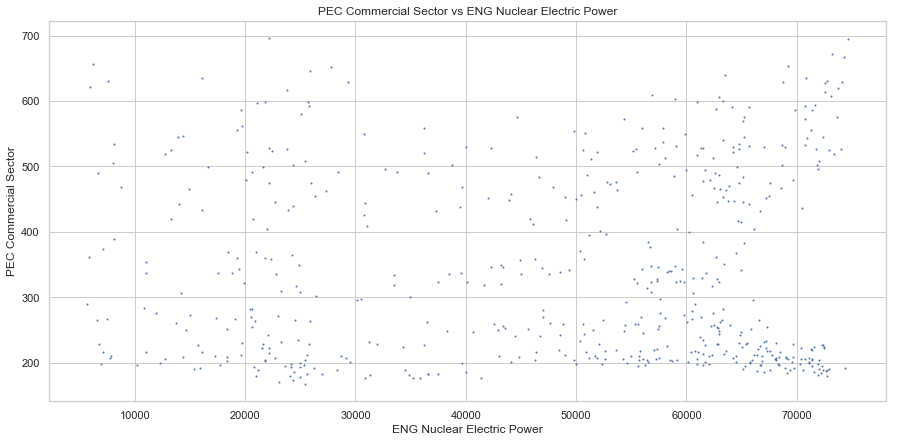

In [32]:
plot_relation('PEC Commercial Sector','ENG Nuclear Electric Power')

In [39]:
# Convert YYYYMM string to datetime format
merged_df['YYYYMM_dt'] = merged_df['YYYYMM'].apply(lambda x: datetime.datetime.strptime(str(x), "%Y%m"))
merged_df.head()

,YYYYMM,Value_CONSUME,Value_GENERATE,YYYYMM_dt
0,197301,1691.096,6246.251,1973-01-01
1,197302,1511.458,5928.069,1973-02-01
2,197303,1559.159,6649.007,1973-03-01
3,197304,1470.152,5876.392,1973-04-01
4,197305,1551.631,5696.657,1973-05-01


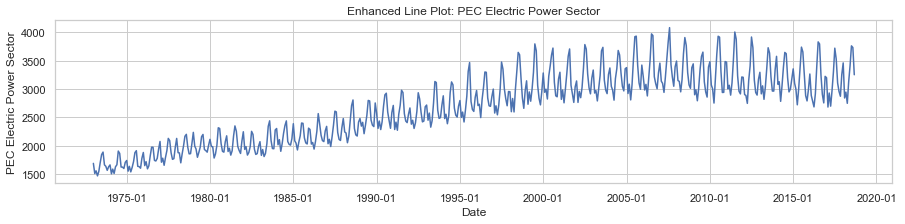

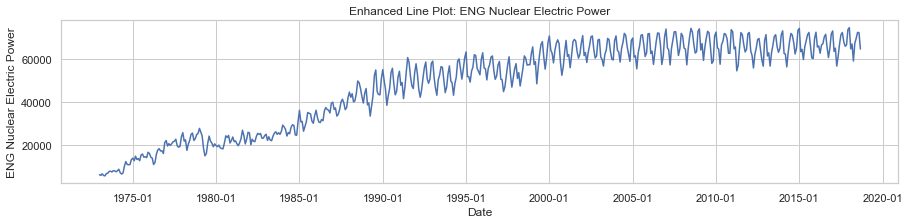

In [40]:
# Enhanced line plot for energy consumption over time
fig, ax = plt.subplots(figsize=(15,3))
ax.plot(merged_df['YYYYMM_dt'], merged_df['Value_CONSUME'])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m')) # format x-axis display
plt.title('Enhanced Line Plot: ' + consume_category)
plt.xlabel('Date');
plt.ylabel(consume_category);

# Enhanced line plot for electricity generation over time
fig, ax = plt.subplots(figsize=(15,3))
ax.plot(merged_df['YYYYMM_dt'], merged_df['Value_GENERATE'])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m')) # format x-axis display
plt.title('Enhanced Line Plot: ' + generate_category)
plt.xlabel('Date');
plt.ylabel(generate_category);

### Exercise 2:

Write code to determine if the oscillations in variable ```PEC Electric Power Sector``` are getting larger over time (hint: use ```merged_df['Value_CONSUME'].pct_change()```). Plot the percentage change for each month across time, using the formated dates on the x-axis.

Text(0, 0.5, 'PEC Electric Power Sector')

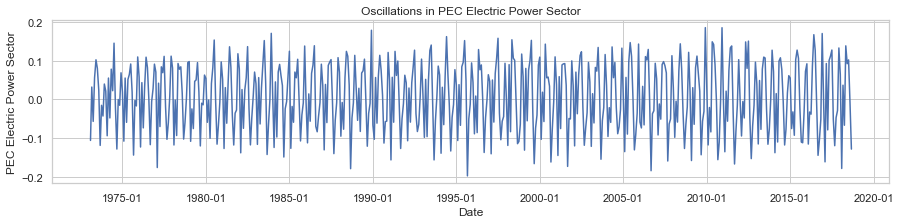

In [47]:
fig, ax = plt.subplots(figsize=(15,3))
ax.plot(merged_df['YYYYMM_dt'][1:], merged_df['Value_CONSUME'].pct_change()[1:])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m')) # format x-axis display
plt.title('Oscillations in ' + consume_category)
plt.xlabel('Date');
plt.ylabel(consume_category)


We see that the percentage changes from month to month are not growing significantly over time. This indicates that the percentage fluctuations in energy consumption remain relatively constant, even as the total amount of energy used across time has grown.

In light of this, one useful statistic to better understand energy usage relative to electricity generation is the ratio of energy consumed to electricity generated. This may give us insight into how well supply meets demand and how our nuclear power plant business may expand and contract electricity generation in high or low demand periods.

## Analyzing the ratio of energy consumed to electricity generated

Let's calculate the ratio of energy consumed over energy generated. Using ```pandas```'s ```describe()``` method, let's take a look at the distribution of this ratio. Understanding the distribution of the ratio will allow use to see how energy consumption and electricity generation deviate relative to one another. We will continue to look at the ```PEC Electric Power Sector``` energy consumption and ```ENG Nuclear Electric Power``` energy generation for this:

In [50]:
# Add an additional 'Ratio' feature: energy consumed / energy generated
merged_df['Ratio'] = merged_df['Value_CONSUME'] / merged_df['Value_GENERATE']
merged_df['MM'] = merged_df['YYYYMM'].apply(lambda x: int(str(x)[-2:])) # add month for grouping in boxplot
merged_df['Ratio'].describe()

count    549.000000
mean       0.067657
std        0.037364
min        0.042228
25%        0.048509
50%        0.052726
75%        0.076986
max        0.272376
Name: Ratio, dtype: float64

It's also useful to obtain graphical representation of the distribution of data by constructing a histogram. A histogram can be displayed using the ```plt.hist()``` method in Python. This histogram method takes the ```bin``` input which indicates how granularly you'd like to view the data. In this case, we will use 50 bins:

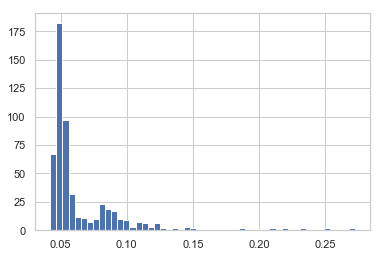

In [53]:
plt.hist(merged_df['Ratio'], bins=50);

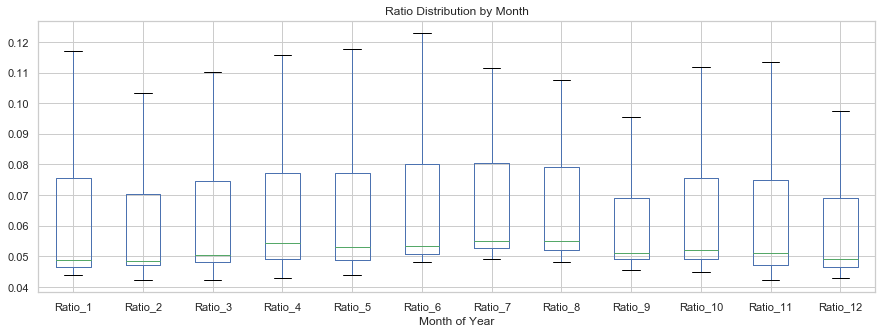

In [62]:
# Select months to use
unique_months = [1,2,3,4,5,6,7,8,9,10,11,12]

# Loop through all months and store each DataFrame in list
df_list = []
for month_int in unique_months:
    temp_df = merged_df[merged_df['MM'] == month_int][['Ratio']].reset_index(drop=True) # Select month
    temp_df = temp_df.rename(columns={'Ratio':'Ratio_'+str(month_int)}) # rename for ease of plotting
    df_list.append(temp_df) # store for later concatenation

# Aggregate data
plot_df = pd.concat(df_list, axis=1)

# Box plots
fig, ax = plt.subplots(figsize=(15,5))
plot_df.boxplot(ax=ax, showfliers=False)
ax.set_xlabel('Month of Year');
ax.set_title('Ratio Distribution by Month');

## Using ```seaborn``` for advanced visualization of the identified cyclical pattern

To further explore the cyclical patterns identified in the summer months, let's label the rows in the ```merged_df``` that represent summer months (call them peak months) and use seaborn's ```pairplot()``` function to visualize the distributional differences in energy consumed and electricity generated between the peak and non-peak months:

C:\Users\Acer\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


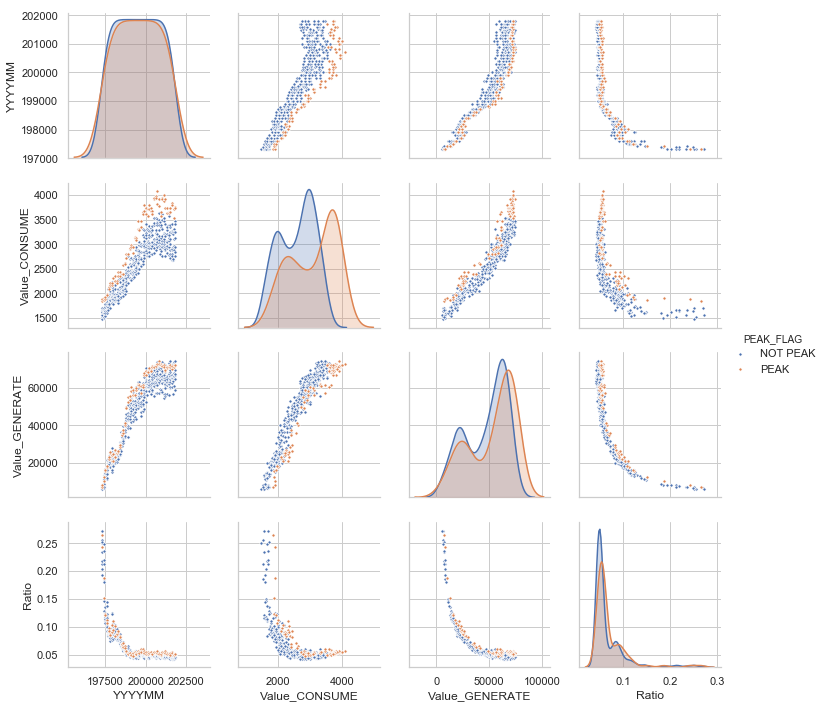

In [63]:
# Add a flag for summer months
customized_df = merged_df.copy()
customized_df['PEAK_FLAG'] = customized_df['YYYYMM'].apply(lambda x: 'PEAK' if str(x)[-2:] in ['07','08'] else 'NOT PEAK')

sns.pairplot(customized_df, hue='PEAK_FLAG', x_vars=['YYYYMM','Value_CONSUME','Value_GENERATE','Ratio'], y_vars=['YYYYMM','Value_CONSUME','Value_GENERATE','Ratio'], plot_kws={'s':10});

We observe that the peak months do have different distributions of energy consumed and energy generated compared to the non-peak months. But thus far, we've only looked at months at an aggregate level to see if some months have higher energy consumption and generation than others. Our boss wants us to investigate how these patterns have changed over time, and part of that assignment requires that we look at these patterns across years.

## Are peak consumption and generation months consistent across many years?

Let's now break down the analysis to a month-by-month level over time to see if the peak cyclical patterns we see are stable across many decades of data.

```seaborn``` offers a powerful **heatmap** method ```heatmap()``` that will allow us to nicely visualize the monthly energy consumed and electricity generated over time:

In [68]:
# Extract year to be used in heatmap
customized_df['YYYY'] = customized_df['YYYYMM'].apply(lambda x: str(x)[:-2])

# Create pivot table (formats data to make it easy to visualize data across months and years)
pivot_elec_df = customized_df.pivot('MM','YYYY','Value_GENERATE')
pivot_ener_df = customized_df.pivot('MM','YYYY','Value_CONSUME')

In [69]:
print(pivot_elec_df)

YYYY      1973       1974       1975       1976       1977       1978  \
MM                                                                      
1     6246.251   7602.790  13938.354  16098.884  22152.064  25832.949   
2     5928.069   8115.522  12733.338  14377.127  19600.518  21832.500   
3     6649.007   8777.497  14881.784  13992.977  20672.203  22448.665   
4     5876.392   7128.892  13327.245  10981.808  19866.564  17579.902   
5     5696.657   6562.335  13763.765  11929.390  20599.284  20416.170   
6     6784.152   7079.595  12743.820  15757.435  21517.301  22185.187   
7     6960.486  10209.908  15372.216  17708.727  21824.835  25007.094   
8     7785.326  12333.452  15879.687  18362.580  22749.668  25599.306   
9     7862.383  11009.752  14396.011  17290.311  19629.992  22188.917   
10    7518.195  10863.505  14626.168  17355.218  19041.045  22996.549   
11    8142.033  11004.327  14164.018  16134.204  19458.412  24900.669   
12    8030.511  13288.168  16678.669  21114.871  23

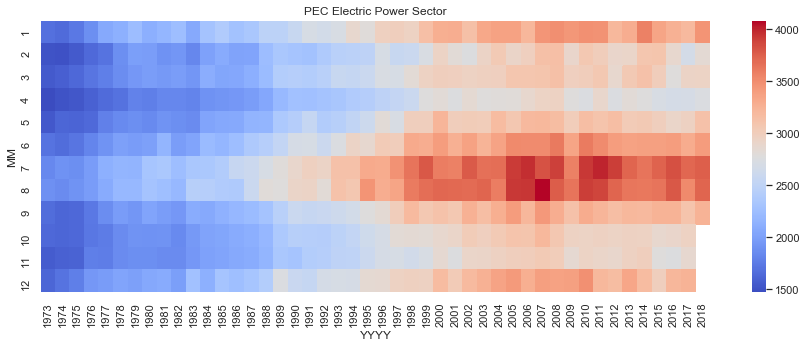

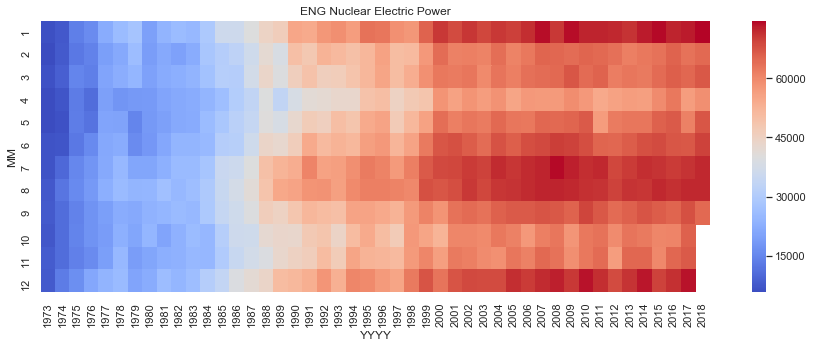

In [67]:
# Heat map of energy consumption by month and year
fig, ax = plt.subplots(figsize=(15,5))
sns.heatmap(pivot_ener_df, cmap="coolwarm", ax=ax);
ax.set_title('PEC Electric Power Sector');

# Heat map of electricity generation by month and year
fig, ax = plt.subplots(figsize=(15,5))
sns.heatmap(pivot_elec_df, cmap="coolwarm", ax=ax);
ax.set_title('ENG Nuclear Electric Power');

### Exercise 4:
Given that we have looked at how the ratio of energy consumed to electricity generated moved over time, let's create a graphical view to determine how stable the relationship between these two quantites has been over the past few decades. Write a script to generate a heat map that shows the ratio of ```Electric Power Sector ``` energy consumption and ```ENG Nuclear Electric Power``` for each YYYY and MM. Use ```customized_df``` for the analysis.

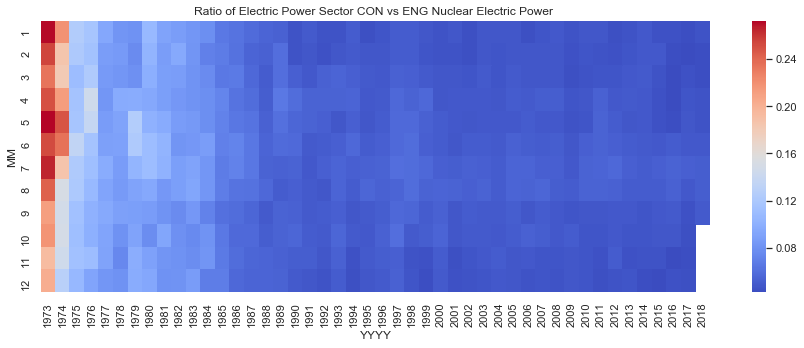

In [73]:
pivot_ratio_df = customized_df.pivot('MM','YYYY','Ratio')
# Heat map of ratio by month and year
fig, ax = plt.subplots(figsize=(15,5))
sns.heatmap(pivot_ratio_df, cmap="coolwarm", ax=ax);
ax.set_title('Ratio of Electric Power Sector CON vs ENG Nuclear Electric Power ');


Here we notice that the ratio of consumed energy to electricity generated has been relatively stable over time. There was a large deviation in the ratio of the two quantities in the early 1970s and a little bit into the early 1980s, but since then the values have generally been stable throughout the year.

## Assessing growth stability  differences in peak month energy demands across time
One way to better understand growth stability of energy consumption and electricity generation is to view distributional data over time. In this case, we will combine boxplots for each year, splitting for peak and non-peak months, and determine how stable the growth, consumption, and generation categories have been.

We will again use seaborn's ```boxplot()``` functionality, but this time we will add a flag to draw two boxplots  for each year based on ```PEAK_FLAG```. The boxplots for peak and non-peak months will be different colors.

### Exercise 5:

Focusing on ```customized_df```, write a script to generate the plot below.

[Text(0, 0, '1973'),
 Text(0, 0, '1974'),
 Text(0, 0, '1975'),
 Text(0, 0, '1976'),
 Text(0, 0, '1977'),
 Text(0, 0, '1978'),
 Text(0, 0, '1979'),
 Text(0, 0, '1980'),
 Text(0, 0, '1981'),
 Text(0, 0, '1982'),
 Text(0, 0, '1983'),
 Text(0, 0, '1984'),
 Text(0, 0, '1985'),
 Text(0, 0, '1986'),
 Text(0, 0, '1987'),
 Text(0, 0, '1988'),
 Text(0, 0, '1989'),
 Text(0, 0, '1990'),
 Text(0, 0, '1991'),
 Text(0, 0, '1992'),
 Text(0, 0, '1993'),
 Text(0, 0, '1994'),
 Text(0, 0, '1995'),
 Text(0, 0, '1996'),
 Text(0, 0, '1997'),
 Text(0, 0, '1998'),
 Text(0, 0, '1999'),
 Text(0, 0, '2000'),
 Text(0, 0, '2001'),
 Text(0, 0, '2002'),
 Text(0, 0, '2003'),
 Text(0, 0, '2004'),
 Text(0, 0, '2005'),
 Text(0, 0, '2006'),
 Text(0, 0, '2007'),
 Text(0, 0, '2008'),
 Text(0, 0, '2009'),
 Text(0, 0, '2010'),
 Text(0, 0, '2011'),
 Text(0, 0, '2012'),
 Text(0, 0, '2013'),
 Text(0, 0, '2014'),
 Text(0, 0, '2015'),
 Text(0, 0, '2016'),
 Text(0, 0, '2017'),
 Text(0, 0, '2018')]

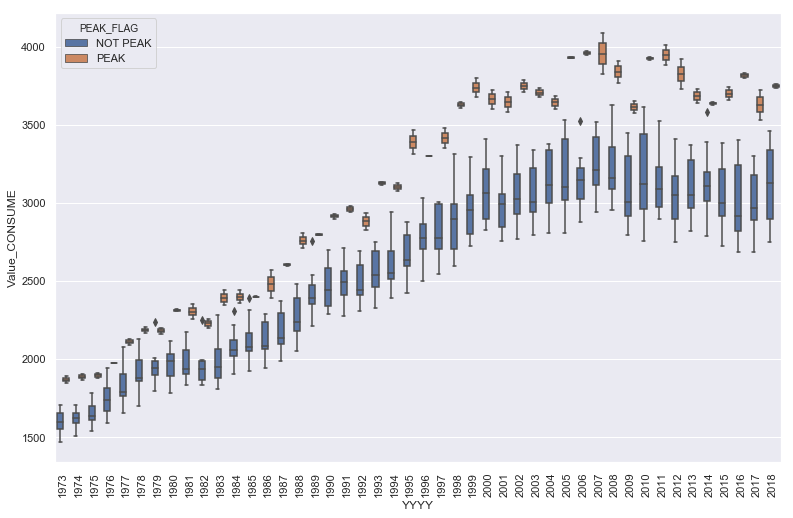

In [79]:
sns.set(rc={'figure.figsize':(13,8.27)})
g = sns.boxplot(x = 'YYYY', y = 'Value_CONSUME',hue = 'PEAK_FLAG',data = customized_df)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

Here we see that growth in both peak and non-peak months has been relatively stable but in recent years has plateaued. Also notice that the difference between peak and non-peak months has widened over time. This increased fluctuation between peak and non-peak months could present an opportunity for your firm, and is worth further investigation.

## Which sectors consume the most energy?

```seaborn``` provides a variety of plots that will be useful in this analysis. We will take a look at ```boxplot()``` and  ```stripplot()```. 

```seaborn``` easily splits the data into categories and creates a boxplot of values for each category:

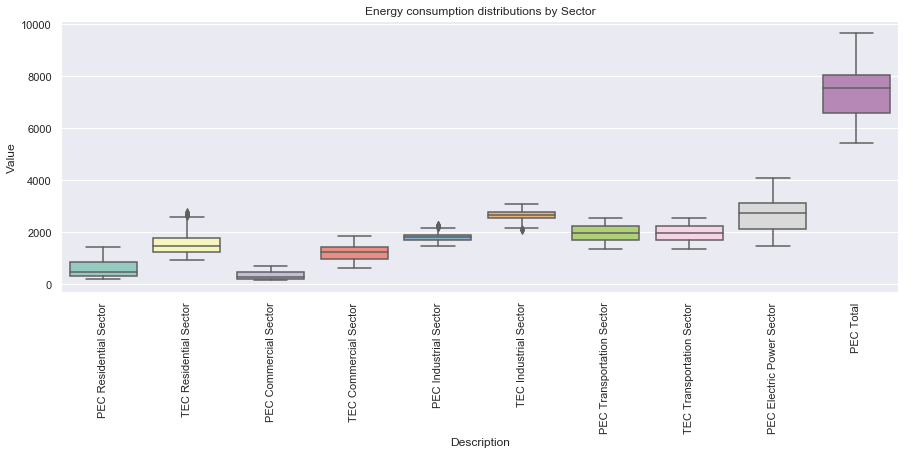

In [81]:
# Boxplot of different sectors' energy consumption values
fig, ax = plt.subplots(figsize=(15,5))
sns.boxplot(x="Description", y="Value", data=clean_energy_df, palette="Set3", ax=ax)
plt.xticks(rotation=90);
plt.title('Energy consumption distributions by Sector');

Here we see that the PEC Electric Power Sector has the highest energy consumption across all sectors. We also see there are sizable differences in the variability of energy consumption across sectors (some box plots have much larger interquartile ranges than others).

However, although boxplots give you some insight into the distribution of the underlying data in each category, they are still relatively blunt instruments. For example, how is the data distributed within the interquartile range? Between the edges of the box and the whiskers? Since a boxplot is created from only five values, it cannot answer these fine-grained questions. However, the **strip plot** is able to combine a 1D scatterplot with a split by category to get an even more granular view of the data.

In [88]:
# Construct DataFrame that will be used for plotting
plot_df = clean_energy_df.copy()
plot_df['YYYYMM_dt'] = plot_df['YYYYMM'].apply(lambda x: datetime.datetime.strptime(str(x), "%Y%m"))
plot_df.head()

,YYYYMM,Value,Description,Unit,MM,YYYY,YYYYMM_dt
0,197301,1313.816,PEC Residential Sector,Trillion Btu,1,1973,1973-01-01
1,197302,1150.011,PEC Residential Sector,Trillion Btu,2,1973,1973-02-01
2,197303,970.362,PEC Residential Sector,Trillion Btu,3,1973,1973-03-01
3,197304,709.631,PEC Residential Sector,Trillion Btu,4,1973,1973-04-01
4,197305,544.596,PEC Residential Sector,Trillion Btu,5,1973,1973-05-01


In [89]:
# One can quickly generate and save plots with ease in Juypter
unique_desc = sorted(plot_df['Description'].unique())
for i in unique_desc:
    fig, ax = plt.subplots(figsize=(15,4))
    temp_df = plot_df[plot_df['Description'] == i]
    ax.plot(temp_df['YYYYMM_dt'], temp_df['Value'])
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y%m')) # format x-axis display

    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.title('Data Description: ' + str(i))
    plt.tight_layout()
    
    # Save to png
    file_name = 'SectorPlot ' + str(i) + '.png'
    print("Saving: " + file_name)
    fig.savefig(os.path.join(plot_dir,file_name)) # save to png (save in plot_dir)
    plt.close(fig) # Do not print plots to notebook (large number of plots can take up significant memory)

Saving: SectorPlot PEC Commercial Sector.png
Saving: SectorPlot PEC Electric Power Sector.png
Saving: SectorPlot PEC Industrial Sector.png
Saving: SectorPlot PEC Residential Sector.png
Saving: SectorPlot PEC Total.png
Saving: SectorPlot PEC Transportation Sector.png
Saving: SectorPlot TEC Commercial Sector.png
Saving: SectorPlot TEC Industrial Sector.png
Saving: SectorPlot TEC Residential Sector.png
Saving: SectorPlot TEC Transportation Sector.png


### Exercise 7:

Write a script to generate a plot of boxplots of ```Value``` for each year in ```clean_energy_df```, where the boxplots are created from the values of each sector category from ```Description``` . For example, the boxplot for year 2000 is below. Save the plots in PNG files in a new folder ```YearlyBoxplotDir``` (create this), and name the figures in the format ```YearlyBoxplot_[yearnum].png```, where you replace ```[yearnum]``` with the correct year. For example, the year 2000 boxplot is saved as ```YearlyBoxplot_2000.png```. You must produce one boxplot figure for each year from 1973 to 2018; hence, you will have one PNG image file per year.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

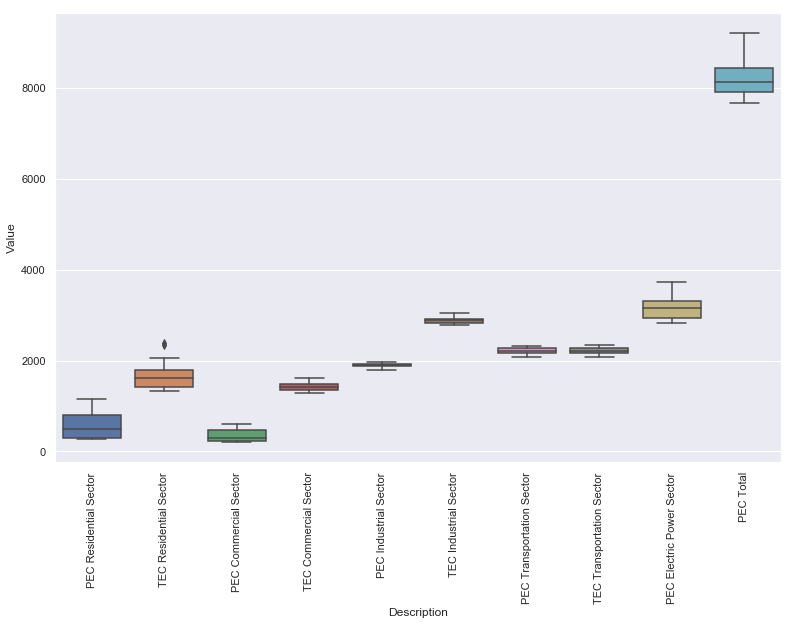

In [98]:

TRY1 = clean_energy_df[clean_energy_df['YYYY'] == 2000]
g = sns.boxplot(x = 'Description',y = 'Value',data = TRY1)
plt.xticks(rotation=90)

In [99]:
# Make new folder to save plots
plot_dir = os.path.join(dir_data, 'YearlyBoxplotDir')

# Only make new folder if it doesn't already exist
if not(os.path.isdir(plot_dir)):
    os.mkdir(plot_dir) # creates new folder

In [104]:
# One can quickly generate and save plots with ease in Juypter
unique_desc = sorted(plot_df['YYYY'].unique())
sns.set(rc={'figure.figsize':(13,8.27)})

for i in range(len(unique_desc)):
    
    temp_df = clean_energy_df[clean_energy_df['YYYY'] == unique_desc[i]]
    sns_plot = sns.boxplot(x = temp_df['Description'], y = temp_df['Value']) 
    plt.xticks(rotation=90)
    plt.xlabel('Description')
    plt.ylabel('Value')
    plt.title('Energy consumption distributions by Sector - Year' + str(i))
    plt.tight_layout()
    
    # Save to png
    fig = sns_plot.get_figure()
    file_name = 'YearlyBoxplot_' + str(unique_desc[i]) + '.png'
    print("Saving: " + file_name)
    fig.savefig(os.path.join(plot_dir,file_name)) # save to png (save in plot_dir)
    plt.close(fig) # Do not print plots to notebook (large number of plots can take up significant memory)

Saving: YearlyBoxplot_1973.png
Saving: YearlyBoxplot_1974.png
Saving: YearlyBoxplot_1975.png
Saving: YearlyBoxplot_1976.png
Saving: YearlyBoxplot_1977.png
Saving: YearlyBoxplot_1978.png
Saving: YearlyBoxplot_1979.png
Saving: YearlyBoxplot_1980.png
Saving: YearlyBoxplot_1981.png
Saving: YearlyBoxplot_1982.png
Saving: YearlyBoxplot_1983.png
Saving: YearlyBoxplot_1984.png
Saving: YearlyBoxplot_1985.png
Saving: YearlyBoxplot_1986.png
Saving: YearlyBoxplot_1987.png
Saving: YearlyBoxplot_1988.png
Saving: YearlyBoxplot_1989.png
Saving: YearlyBoxplot_1990.png
Saving: YearlyBoxplot_1991.png
Saving: YearlyBoxplot_1992.png
Saving: YearlyBoxplot_1993.png
Saving: YearlyBoxplot_1994.png
Saving: YearlyBoxplot_1995.png
Saving: YearlyBoxplot_1996.png
Saving: YearlyBoxplot_1997.png
Saving: YearlyBoxplot_1998.png
Saving: YearlyBoxplot_1999.png
Saving: YearlyBoxplot_2000.png
Saving: YearlyBoxplot_2001.png
Saving: YearlyBoxplot_2002.png
Saving: YearlyBoxplot_2003.png
Saving: YearlyBoxplot_2004.png
Saving: 